In [248]:
import numpy as np
import cmath, math
import scipy
from numpy import linalg as lin
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.linalg import logm, expm
from scipy import integrate
from ipywidgets import interactive

hbar = 1.05457182e-34
Gf = 1.166e-5
#hbar = 1
c0 = 2.997e8
#c = 1
t12 = math.radians(33.44)
t23 = math.radians(49.2)
t13 = math.radians(8.57)
tcp = math.radians(194)
eV = 1.602e-19
Lmax = 2*np.pi*hbar/c0**3
dm21_s = 7.42*1e-5
dm31_s = 2.515*1e-3
dm32_s = dm31_s - dm21_s
#define the falvour number
Ve = 1
Vu = 2
Vt = 3

In [2]:
def c(theta):
    c = np.cos(theta)
    return c
def s(theta):
    s = np.sin(theta)
    return s
def hermi(m):
    m = np.conjugate(m).T
    return m
def delta(a,b):
    if a == b:
        output = 1
    else:
        output = 0
    return output
def tri(ratio,dm):
    num = ratio*dm/4
    return num
def vcc(Ne):
    Vcc = np.sqrt(2)*Gf*Ne
    return Vcc
#normalize the wave packet norm and calculate the probalbility
def normalize(psi):
    psi_n = psi/sum(psi)
    return psi_n
#PMNS matrix
U = np.array([[c(t12)*c(t13),s(t12)*c(t13),s(t13)*np.exp(-1j*tcp)],
              [-s(t12)*c(t23)-c(t12)*s(t23)*s(t13)*np.exp(1j*tcp), c(t12)*c(t23)-s(t12)*s(t23)*s(t13)*np.exp(1j*tcp),s(t23)*c(t13)],
              [s(t12)*s(t23)-c(t12)*c(t23)*s(t13)*np.exp(1j*tcp),-c(t12)*s(t23)-s(t12)*c(t23)*s(t13)*np.exp(1j*tcp),c(t23)*c(t13)]])
L =3e3
flavour_init = Vt
flavour_end = Ve
E=6e3
ratio = 1e9/1e3*L/E
    
def probability(ratio,flavour_init,flavour_end):
    
    #Vmatt = np.sqrt(2)*Gf*np.diag()
    
    P = np.zeros(1)
    Lmax = np.zeros(1)
    if (flavour_init == 2 and flavour_end == 1) or (flavour_init == 1 and flavour_end == 2):
        dm = dm21_s
        theta = t12
        P = np.sin(2*theta)**2*np.sin(1.27*dm*ratio)**2
        Lmax = 1.27*dm*ratio
    if (flavour_init == 3 and flavour_end == 1) or (flavour_init == 1 and flavour_end == 3):
        dm = dm31_s
        theta = t13
        P = np.sin(2*theta)**2*np.sin(1.27*dm*ratio)**2
        Lmax = 1.27*dm*ratio
    if (flavour_init == 3 and flavour_end == 2) or (flavour_init == 2 and flavour_end == 3):
        dm = dm32_s
        theta = t23
        P = np.sin(2*theta)**2*np.sin(1.27*dm*ratio)**2
        Lmax = 1.27*dm*ratio
    
    return P,Lmax

P,Lmax = probability(200,Vt,Ve)     
#iplot = interactive(plotter,L1=(0,3e8,1000))
def survial(falvour_init,ratio):
    if falvour_init == Ve:
        P = 1-np.sin(2*t13)**2*tri(ratio,dm32_s)-c(t13)**4*np.sin(2*t12)**2*tri(ratio,dm21_s)
    if falvour_init == Vu:
        P = 1-4*c(t13)**2*s(t23)**2*(1-np.square(c(t13)*s(t23)))*tri(ratio,dm32_s)-c(t23)**4*np.sin(2*t12)**2*tri(ratio,dm21_s)
    if falvour_init == Vt:
        P = 1-4*c(t13)**2*c(t23)**2*(1-np.square(c(t13)*s(t23)))*tri(ratio,dm32_s)-c(t23)**4*np.sin(2*t12)**2*tri(ratio,dm21_s)
    
    return P


P,Lmax*E,survial(Vt,ratio)

(0.03087631231503678, 3832.8600000000006, -224.44419188792017)

In [231]:
#mass distribution
t12 = math.radians(33.44)
t23 = math.radians(49.2)
t13 = math.radians(8.57)
tcp = math.radians(194)
U = np.array([[c(t12)*c(t13),s(t12)*c(t13),s(t13)*np.exp(-1j*tcp)],
              [-s(t12)*c(t23)-c(t12)*s(t23)*s(t13)*np.exp(1j*tcp), c(t12)*c(t23)-s(t12)*s(t23)*s(t13)*np.exp(1j*tcp),s(t23)*c(t13)],
              [s(t12)*s(t23)-c(t12)*c(t23)*s(t13)*np.exp(1j*tcp),-c(t12)*s(t23)-s(t12)*c(t23)*s(t13)*np.exp(1j*tcp),c(t23)*c(t13)]])
v1 = np.abs(np.dot(np.conjugate(U),np.array([[1,0,0]]).T))
v2 = np.abs(np.dot(np.conjugate(U),np.array([[0,1,0]]).T))
v3 = np.abs(np.dot(np.conjugate(U),np.array([[0,0,1]]).T))
labels = ['V1', 'V2', 'V3']
data = [v1, v2, v3]
data

[array([[0.82514619],
        [0.26970333],
        [0.49638079]]),
 array([[0.54491056],
        [0.60575878],
        [0.57976614]]),
 array([[0.14901761],
        [0.74854286],
        [0.64612486]])]

Enter the max ratio of L/E: 40000
Enter the initial state: 2
Enter the final state: 1
The best distance is 0.007546266266266267 * Neutrino_Energy (km)


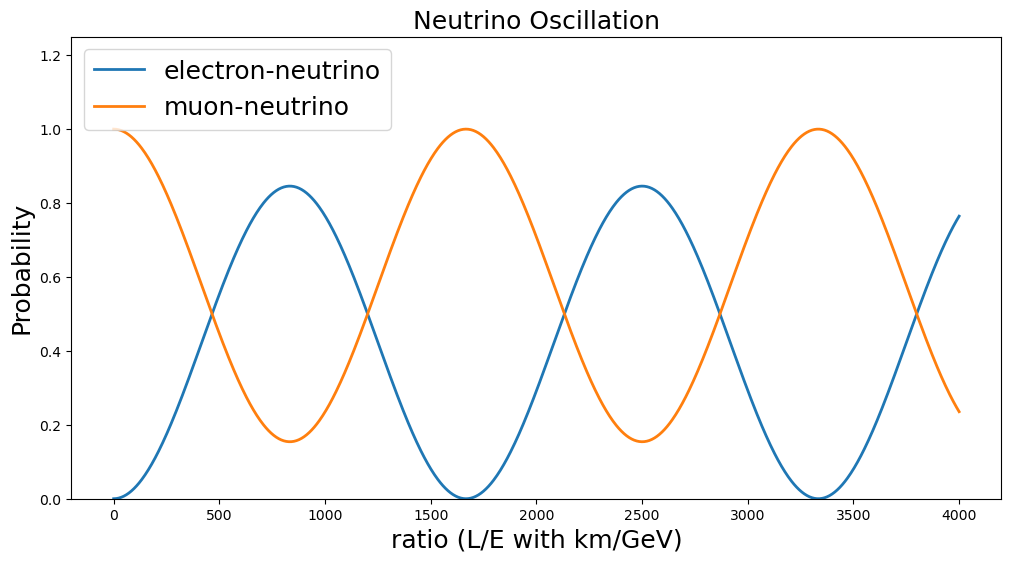

In [153]:
#Two flavours oscillation
ratio = np.linspace(0,8e4,1000)
P = np.zeros(len(ratio))
P1 = np.zeros(len(ratio))
Lmax = np.zeros(len(ratio))
ratio_max = int(input("Enter the max ratio of L/E: "))
flavour_init = int(input("Enter the initial state: "))
flavour_end = int(input("Enter the final state: "))
for r_idx in range(len(ratio)):
    P[r_idx],Lmax[r_idx] = probability(ratio[r_idx],flavour_init,flavour_end)
    #P[r_idx],Lmax[r_idx] = probability(ratio[r_idx],Ve,Vu)
    P1[r_idx] = 1 - P[r_idx]
plt.figure(figsize=(12,6))
plt.plot(ratio/20,P, lw=2)
plt.plot(ratio/20,P1, lw=2)
plt.legend(['electron-neutrino','muon-neutrino'], fontsize=18)
plt.ylabel('Probability', fontsize=18)
plt.xlabel('ratio (L/E with km/GeV)', fontsize=18)
plt.title(f'Neutrino Oscillation', fontsize=18)
plt.ylim([0,1.25])
print("The best distance is",Lmax[1],"* Neutrino_Energy (km)")

    

In [4]:

def plotter(ratio):
    x = np.linspace(0,ratio,int(ratio/100))
    P = np.square(np.abs((2*U[0,2]*np.conjugate(U[1,2])*np.sin(tri(x,dm31_s))+2*np.conjugate(U[1,1])*U[0,1])*np.sin(tri(x,dm21_s))))
    #ratio = np.linspace(0,ratio,int(ratio/100))
    plt.plot(x/10,P)
    plt.title('Probability for muon-neutrino to electron-neutrino(two flavour)')
    plt.ylabel('Probability', fontsize=18)
    plt.xlabel('ratio (L/E with km/GeV)', fontsize=18)
    plt.grid()
    plt.ylim(0,1)
    plt.show()



In [5]:
ratio = int(input("Enter the max ratio of L/E: "))
#Pue = np.square(np.abs((2*U[0,2]*np.conjugate(U[1,2])*np.sin(tri(ratio,dm31_s))+2*np.conjugate(U[1,1])*U[0,1])*np.sin(tri(ratio,dm21_s))))
iplot = interactive(plotter,ratio=(0,ratio,int(ratio/100)))
iplot

Enter the max ratio of L/E: 40000


interactive(children=(IntSlider(value=20000, description='ratio', max=40000, step=400), Output()), _dom_classe…

three flavour oscillation

In [6]:

def sum_real(ratio,i,e):
    d21 = np.square(np.sin(dm21_s*ratio/4))*np.real(np.conjugate(U[i-1,1])*U[e-1,1]*U[i-1,0]*np.conjugate(U[e-1,0]))
    d32 = np.square(np.sin(dm32_s*ratio/4))*np.real(np.conjugate(U[i-1,2])*U[e-1,2]*U[i-1,1]*np.conjugate(U[e-1,1]))
    d31 = np.square(np.sin(dm31_s*ratio/4))*np.real(np.conjugate(U[i-1,2])*U[e-1,2]*U[i-1,0]*np.conjugate(U[e-1,0]))
    real = d21+d32+d31
    return real
def sum_imag(ratio,i,e):
    d21 = np.sin(dm21_s*ratio/2)*np.imag(np.conjugate(U[i-1,1])*U[e-1,1]*U[i-1,0]*np.conjugate(U[e-1,0]))
    d32 = np.sin(dm32_s*ratio/2)*np.imag(np.conjugate(U[i-1,2])*U[e-1,2]*U[i-1,1]*np.conjugate(U[e-1,1]))
    d31 = np.sin(dm31_s*ratio/2)*np.imag(np.conjugate(U[i-1,2])*U[e-1,2]*U[i-1,0]*np.conjugate(U[e-1,0]))
    imag = d21+d32+d31
    return imag
def probability_3(ratio,flavour_init,flavour_end):
    
    #Vmatt = np.sqrt(2)*Gf*np.diag()
    
    P = np.zeros(1)
    if flavour_init != flavour_end:
        
        P = np.abs(delta(flavour_init,flavour_end)-4*sum_real(ratio,flavour_init,flavour_end)+2*sum_imag(ratio,flavour_init,flavour_end))
    else:
        P = np.abs(delta(flavour_init,flavour_end)-4*sum_real(ratio,flavour_init,flavour_end))+2*sum_imag(ratio,flavour_init,flavour_end)
    return P

#get the input
ratio = int(input("Enter the max ratio of L/E: "))
flavour_init = int(input("Enter the initial state: "))
flavour_end = int(input("Enter the final state: "))
print("the probability is :",probability_3(ratio,flavour_init,flavour_end))

Enter the max ratio of L/E: 40000
Enter the initial state: 2
Enter the final state: 1
the probability is : 0.1960299961056876


In [330]:
import matplotlib.pyplot as plt
#import plotly.graph_objects as go  # not installed in annaconda
from ipywidgets import interactive
def plotter_3(ratio,flavour_init,flavour_end):
    x = np.linspace(0,ratio,int(ratio/10))
    P = probability_3(x,flavour_init,flavour_end)
    P12 = probability_3(x,1,2)
    P13 = probability_3(x,1,3)
    Psum=np.zeros([3,len(x)])
    Psum[0,:]=P
    Psum[1,:]=P12
    Psum[2,:]=P13
    plt.figure(figsize=(10,6))
    plt.title(f'Time evolution heat map', fontsize=18)
    plt.imshow(Psum,aspect='auto',extent=(np.min(x/10), np.max(x/10), 1, 3))
    plt.xlabel('Ratio (L/E with km/GeV)', fontsize=18)
    plt.show()
    plt.figure(figsize=(12,6))
    plt.plot(x/10,P)
    plt.plot(x/10,P12)
    plt.plot(x/10,P13)
    plt.grid()
    plt.ylim(0,1)
    plt.legend(['Pe→e','Pe→u','Pe→t'], fontsize=18)
    plt.ylabel('Probability', fontsize=18)
    plt.xlabel('Ratio (L/E with km/GeV)', fontsize=18)
    plt.title(f'Probability of electron neutrino oscillation', fontsize=18)
    plt.show()
    


In [331]:
ratio = int(input("Enter the max ratio of L/E(in MeV): "))
iplot_3 = interactive(plotter_3,ratio=(0,ratio,int(ratio/10)),flavour_init=(1,3,1),flavour_end=(1,3,1))
iplot_3
# Generation for Ve,Vu,Vt = 1,2,3

Enter the max ratio of L/E(in MeV): 60000


interactive(children=(IntSlider(value=30000, description='ratio', max=60000, step=6000), IntSlider(value=2, de…

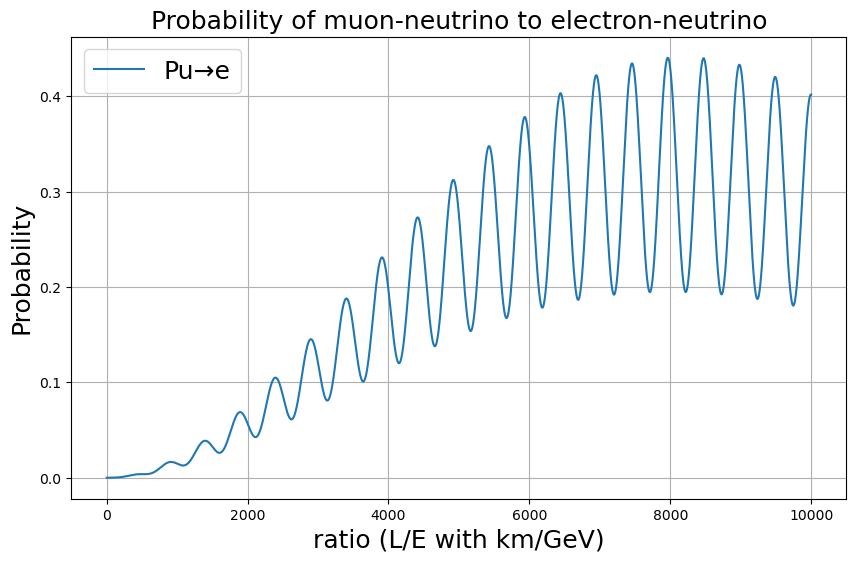

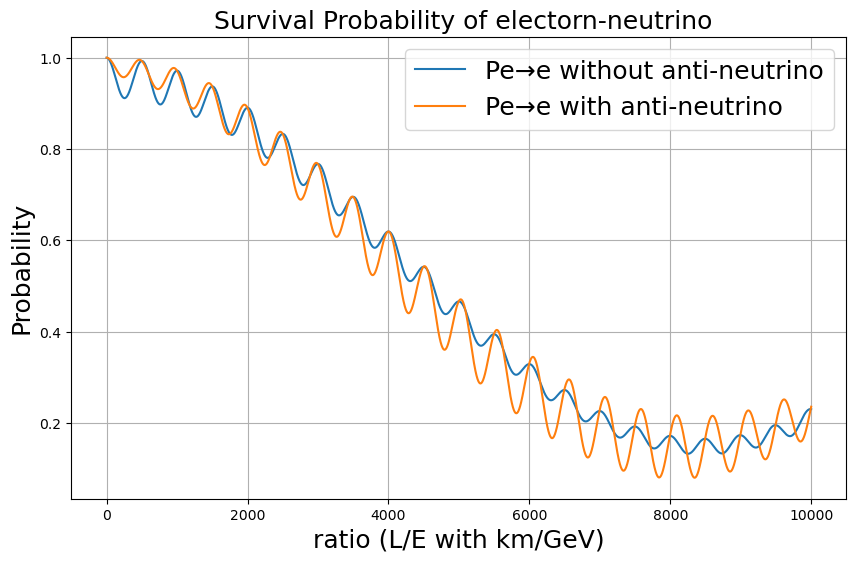

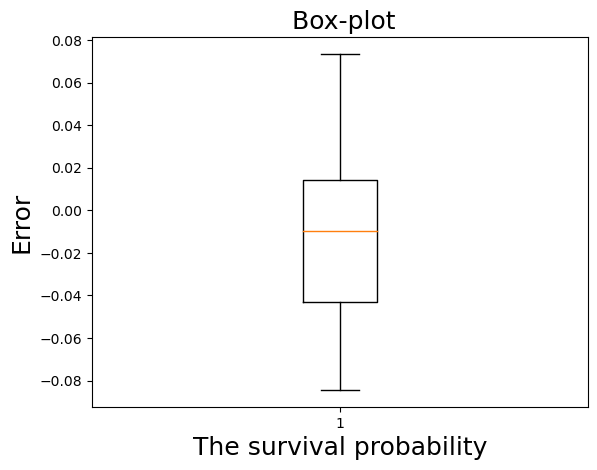

In [277]:
def shift(P):
    x = 1/max(P)
    P = P*x
    return P
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

ratio = 100000
ratio = np.linspace(0,ratio,int(ratio/10))
Pue = np.zeros(len(ratio),dtype = np.complex128)
Pee = np.zeros(len(ratio),dtype = np.complex128)
Pue = (np.square(np.abs(((((2*U[0,2]*np.conjugate(U[1,2])*np.sin(tri(ratio,dm31_s))*np.exp(-1j*tri(ratio,dm32_s))+2*np.conjugate(U[1,1])*U[0,1])*np.sin(tri(ratio,dm21_s))))))))
Pee = 1-2*np.sin(2*t13)*np.sin(dm31_s/4*ratio)**2-np.cos(t13)**4*np.sin(2*t12)**2*np.sin(1.27*dm31_s*1e-3/4*ratio)**2
Pue1 = np.sin(2*t13)**2*np.sin(2*t23)**2**np.sin(1.27*dm32_s/4*ratio)**2
Peu = Pue-probability_3(ratio,2,3)
Pee = probability_3(ratio,1,1)
t23 = math.radians(49.2)+np.pi/2
Putbar = probability_3(ratio,2,3)
Puebar = probability_3(ratio,2,1)

t23 = math.radians(49.2)
Peu = Peu + Putbar
Pet = probability_3(ratio,1,3)
Peubar = Puebar + 2*Putbar
#https://warwick.ac.uk/fac/sci/physics/staff/academic/boyd/stuff/neutrinolectures/lec_oscillations.pdf
#Pee = np.cos(t13)**4*(1-np.sin(2*t12)**2*np.sin(dm21_s*ratio/4)**2)
#fit for kamiokande
plt.figure(figsize=(10,6))
plt.plot(ratio/10,Pue)
plt.ylabel('Probability', fontsize=18)
plt.grid()
plt.legend(['Pu→e'], fontsize=18)
plt.xlabel('ratio (L/E with km/GeV)', fontsize=18)
plt.title(f'Probability of muon-neutrino to electron-neutrino', fontsize=18)
plt.figure(figsize=(10,6))
plt.plot(ratio/10,Pee)
plt.plot(ratio/10,1-Peu-Pet)
#plt.plot(ratio/10,Put)
#plt.plot(ratio/10,Putbar)
plt.grid()
plt.legend(['Pe→e without anti-neutrino','Pe→e with anti-neutrino'], fontsize=18)
plt.ylabel('Probability', fontsize=18)
plt.xlabel('ratio (L/E with km/GeV)', fontsize=18)
plt.title(f' Survival Probability of electorn-neutrino', fontsize=18)
pccs = np.corrcoef(Pee,1-Peu-Pet)

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
rmse(1-Peu-Pet,Pee)
np.cov(1-Peu-Pet,Pee)
fig = plt.figure()
# Creating plot
plt.boxplot(1-Peu-Pet-Pee)
plt.title(f' Box-plot', fontsize=18)
plt.xlabel('The survival probability', fontsize=18)
plt.ylabel('Error', fontsize=18)
# show plot
plt.show()

TypeError: Invalid shape (10000,) for image data

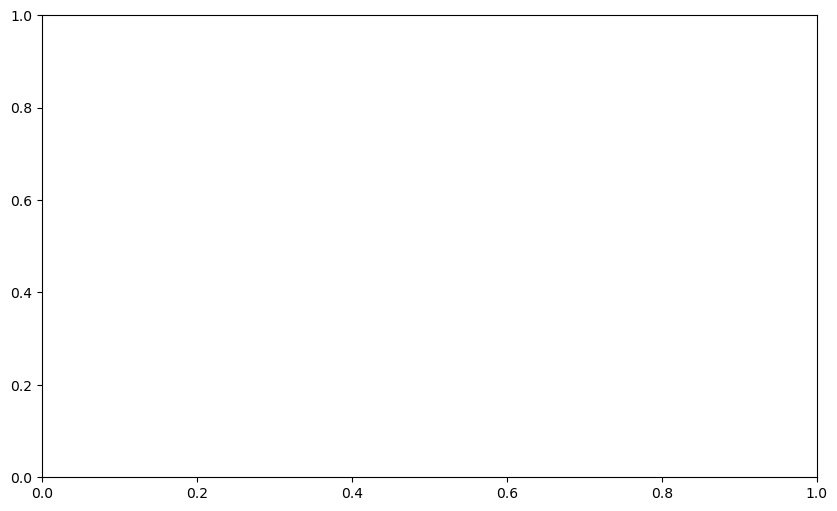

In [179]:
def sum_realf(ratio,i,e,U,dm31_s,dm21_s,dm32_s):
    d21 = np.square(np.sin(dm21_s*ratio/4))*np.real(np.conjugate(U[i-1,1])*U[e-1,1]*U[i-1,0]*np.conjugate(U[e-1,0]))
    d32 = np.square(np.sin(dm32_s*ratio/4))*np.real(np.conjugate(U[i-1,2])*U[e-1,2]*U[i-1,1]*np.conjugate(U[e-1,1]))
    d31 = np.square(np.sin(dm31_s*ratio/4))*np.real(np.conjugate(U[i-1,2])*U[e-1,2]*U[i-1,0]*np.conjugate(U[e-1,0]))
    real = d21+d32+d31
    return real
def sum_imagf(ratio,i,e,U,dm31_s,dm21_s,dm32_s):
    d21 = np.sin(dm21_s*ratio/2)*np.imag(np.conjugate(U[i-1,1])*U[e-1,1]*U[i-1,0]*np.conjugate(U[e-1,0]))
    d32 = np.sin(dm32_s*ratio/2)*np.imag(np.conjugate(U[i-1,2])*U[e-1,2]*U[i-1,1]*np.conjugate(U[e-1,1]))
    d31 = np.sin(dm31_s*ratio/2)*np.imag(np.conjugate(U[i-1,2])*U[e-1,2]*U[i-1,0]*np.conjugate(U[e-1,0]))
    imag = d21+d32+d31
    return imag
def probability_free(ratio,flavour_init,flavour_end,t12,t13,t23,dm21_s,dm31_s):
    dm32_s = dm31_s-dm21_s
    t12 = math.radians(t12)
    t13 = math.radians(t13)
    t23 = math.radians(t23)
    U = np.array([[c(t12)*c(t13),s(t12)*c(t13),s(t13)*np.exp(-1j*tcp)],
              [-s(t12)*c(t23)-c(t12)*s(t23)*s(t13)*np.exp(1j*tcp), c(t12)*c(t23)-s(t12)*s(t23)*s(t13)*np.exp(1j*tcp),s(t23)*c(t13)],
              [s(t12)*s(t23)-c(t12)*c(t23)*s(t13)*np.exp(1j*tcp),-c(t12)*s(t23)-s(t12)*c(t23)*s(t13)*np.exp(1j*tcp),c(t23)*c(t13)]])
    P = np.zeros(1)
    if flavour_init != flavour_end:
        
        P = np.abs(delta(flavour_init,flavour_end)-4*sum_realf(ratio,flavour_init,flavour_end,U,dm31_s,dm21_s,dm32_s)+2*sum_imagf(ratio,flavour_init,flavour_end,U,dm31_s,dm21_s,dm32_s))
    else:
        P = np.abs(delta(flavour_init,flavour_end)-4*sum_realf(ratio,flavour_init,flavour_end,U,dm31_s,dm21_s,dm32_s))
    return P
def plotter_free(ratio,flavour_init,flavour_end,theta12,theta13,theta23,mass_21,mass_31):
    mass_21 = mass_21 * 1e-5
    mass_31 = mass_31 * 1e-3
    x = np.linspace(0,ratio,int(ratio/10))
    P = probability_free(x,flavour_init,flavour_end,theta12,theta13,theta23,mass_21,mass_31)
    Pnm = probability_free(x,flavour_init,flavour_end,theta12,theta13,theta23,0,0)
    plt.figure(figsize=(12,6))
    plt.plot(x/10,P)
    plt.plot(x/10,Pnm)
    plt.grid()
    #plt.ylim(0,1)
    plt.legend(['normal case','without mass difference'], fontsize=18)
    plt.ylabel('Probability', fontsize=18)
    plt.xlabel('ratio (L/E with km/GeV)', fontsize=18)
    plt.title(f'Probability of customised model', fontsize=18)
    plt.show()
iplot_3 = interactive(plotter_free,ratio=(0,40000,int(4000)),flavour_init=(1,3,1),flavour_end=(1,3,1),theta12=(-180,180,0.1),theta13=(-180,180,0.1),theta23=(-180,180,0.1),mass_21=(0,100,0.1),mass_31=(0,100,0.1))
iplot_3

interactive(children=(IntSlider(value=20000, description='ratio', max=40000, step=4000), IntSlider(value=2, de…

Oscillation in Matter

In [271]:
#MSW effect
Ve = 1
Vu = 2
Vt = 3
Gf = 1.166e-5
#
dm31_s = np.zeros(1,dtype=np.complex64)
dm21_s = np.zeros(1,dtype=np.complex64)
dm21_s = 7.42*1e-5
dm31_s = 2.515*1e-3
t12 = math.radians(33.44)
t23 = math.radians(49.2)
t13 = math.radians(8.57)
E = 2e6
def probability_matter(Ne,ratio,flavour_init,flavour_end,t12,t13,t23,dm21_s,dm31_s):
    ep=np.sqrt(2)*Gf*Ne*2
    U = np.array([[c(t12)*c(t13),s(t12)*c(t13),s(t13)*np.exp(-1j*tcp)],
              [-s(t12)*c(t23)-c(t12)*s(t23)*s(t13)*np.exp(1j*tcp), c(t12)*c(t23)-s(t12)*s(t23)*s(t13)*np.exp(1j*tcp),s(t23)*c(t13)],
              [s(t12)*s(t23)-c(t12)*c(t23)*s(t13)*np.exp(1j*tcp),-c(t12)*s(t23)-s(t12)*c(t23)*s(t13)*np.exp(1j*tcp),c(t23)*c(t13)]])
    flavour = flavour_end
    if flavour_init == 1:
        flavour_init = np.array([1,0,0])
    elif flavour_init == 2:
        flavour_init = np.array([0,1,0])
    elif flavour_init == 3:
        flavour_init = np.array([0,0,1])
    if flavour_end == 1:
        flavour_end = np.array([1,0,0])
    elif flavour_end == 2:
        flavour_end = np.array([0,1,0])
    elif flavour_end == 3:
        flavour_end = np.array([0,0,1])
    dm21_s = np.sqrt((dm21_s-np.cos(2*t12)-ep)**2+(dm21_s*np.sin(2*t12)**2))
    dm31_s = np.sqrt((dm31_s-np.cos(2*t13)-ep)**2+(dm31_s*np.sin(2*t13)**2))
    dm32_s = dm31_s-dm21_s
    t12 = np.arcsin(np.sqrt(np.sin(2*t12)**2/(np.sin(2*t12)**2+(np.cos(2*t12)-ep/dm21_s)**2)))/2
    t13 = np.arcsin(np.sqrt(np.sin(2*t13)**2/(np.sin(2*t13)**2+(np.cos(2*t13)-ep/dm31_s)**2)))/2
    t23 = np.arcsin(np.sqrt(np.sin(2*t23)**2/(np.sin(2*t23)**2+(np.cos(2*t23)-ep/dm32_s)**2)))/2
    P = np.zeros((len(ratio)))
    psi = np.zeros((len(ratio)),dtype = np.complex128)
    V = np.diag([np.sqrt(2)*Gf*Ne,0,0])
    for r_idx in range(len(ratio)):  
        H = U@np.diag([0,dm21_s/2/E,dm31_s/2/E])@hermi(U)+V
        w, v = lin.eig(H)
        #Sort eigenvectors in order of eigenvalue 
        idx = np.argsort(w) 
        w = w[idx]
        v = v[:,idx]
        #Coefficient
        c_t_1 = np.zeros((len(ratio)),dtype = np.complex128)
        c_t_2 = np.zeros((len(ratio)),dtype = np.complex128)
        c_t_3 = np.zeros((len(ratio)),dtype = np.complex128)
        c_t_1[0] = np.conj(v[:,0].T) @ flavour_init
        c_t_2[0] = np.conj(v[:,1].T) @ flavour_init
        c_t_3[0] = np.conj(v[:,2].T) @ flavour_init
        t = ratio[r_idx]
        #If H is static, only coeffs change w.r.t to time!
        c_t_1[r_idx] = c_t_1[0] * np.exp(-1j*w[0]*t)
        c_t_2[r_idx] = c_t_2[0] * np.exp(-1j*w[1]*t)
        c_t_3[r_idx] = c_t_3[0] * np.exp(-1j*w[2]*t)
        psi = c_t_1[r_idx]*v[:,0] + c_t_2[r_idx]*v[:,1] +c_t_3[r_idx]*v[:,2]
        P[r_idx] = np.abs(flavour_end*psi.T)@np.abs((flavour_end*psi.T))
    return psi
def plotter_matter(Ne,ratio,flavour_init,flavour_end,theta12,theta13,theta23,mass_21,mass_31):
    #ratio = L/E
    ratio = np.linspace(0,4e4,1000)
    x = np.linspace(0,ratio,1000)
    P = probability_matter(Ne,ratio,flavour_init,flavour_end,theta12,theta13,theta23,mass_21,mass_31)
    plt.figure(figsize=(12,6))
    plt.plot(ratio,P)
    plt.grid()
    plt.ylim(0,1)
    #plt.legend(['flavour_end'], fontsize=18)
    plt.ylabel('Probability', fontsize=18)
    plt.xlabel('Distance with km', fontsize=18)
    plt.title(f'Probability of flavour_init to flavour_end', fontsize=18)
    plt.show()
L = np.linspace(0,3e8,1000)
ratio = np.linspace(0,4e4,1000)
Ne = 0
Pee = (probability_matter(Ne,ratio,Ve,Ve,t12,t13,t23,dm21_s,dm31_s))
Pee

array([ 9.99996702e-01-0.00137759j, -2.22667414e-04-0.00026291j,
       -1.87570611e-04+0.00213169j])

In [ ]:
Peu = probability_matter(Ne,ratio,Ve,Vu,t12,t13,t23,dm21_s,dm31_s)
Pet = probability_matter(Ne,ratio,Ve,Vt,t12,t13,t23,dm21_s,dm31_s)
plt.figure(figsize=(10,6))
plt.ylabel('Probability', fontsize=18)
plt.xlabel('ratio (L/E with km/GeV)', fontsize=18)
plt.title(f'Oscillation in matter', fontsize=18)
plt.plot(ratio/10,Pee)
plt.plot(ratio/10,Peu)
plt.plot(ratio/10,Pet)
plt.show()

In [237]:
iplot_matter = interactive(plotter_matter,Ne=(0,40000,400),ratio=(0,40000,400),flavour_init=(1,3,1),flavour_end=(1,3,1),theta12=(-180,180,0.1),theta13=(-180,180,0.1),theta23=(-180,180,0.1),mass_21=(0,100e-5,0.1e-5),mass_31=(0,100e-3,0.1e-3))
iplot_matter

interactive(children=(IntSlider(value=20000, description='Ne', max=40000, step=400), IntSlider(value=20000, de…

Oscillation in dark matter

Interaction Figure: with dark matter

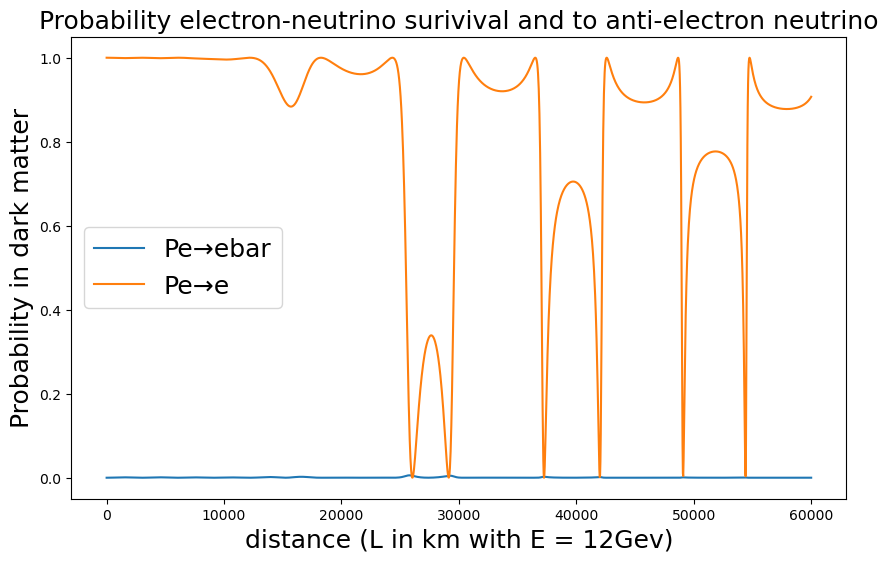

In [460]:
Ve = np.array([1,0,0,0,0,0])
Vu = np.array([0,1,0,0,0,0])
Vt = np.array([0,0,1,0,0,0])
Vebar = np.array([0,0,0,1,0,0])
Vubar = np.array([0,0,0,0,1,0])
Vtbar = np.array([0,0,0,0,0,1])
t12 = math.radians(33.44)
t23 = math.radians(49.2)
t13 = math.radians(8.57)
tcp = math.radians(194)
eV = 1.602e-19
Lmax = 2*np.pi*hbar/c0**3
dm21_s = 7.42*1e-5
dm31_s = 2.515*1e-3
dm32_s = dm31_s - dm21_s

def P_dark(E,L,Init,End,theta12,theta13,theta23,mass_21,mass_31):
    #in natural unit
    Lr = L
    m = np.zeros([3,3])
    m[0,0] = 0
    m[1,1] = dm21_s
    m[2,2] = dm31_s
    U = np.array([[c(t12)*c(t13),s(t12)*c(t13),s(t13)*np.exp(-1j*tcp)],
              [-s(t12)*c(t23)-c(t12)*s(t23)*s(t13)*np.exp(1j*tcp), c(t12)*c(t23)-s(t12)*s(t23)*s(t13)*np.exp(1j*tcp),s(t23)*c(t13)],
              [s(t12)*s(t23)-c(t12)*c(t23)*s(t13)*np.exp(1j*tcp),-c(t12)*s(t23)-s(t12)*c(t23)*s(t13)*np.exp(1j*tcp),c(t23)*c(t13)]])
    Bp = np.zeros([3,3])
    Ap = np.zeros([3,3])
    Bp = np.diag([dm21_s/2/E,dm31_s/2/E,dm32_s/2/E])
    #Ap = np.diag([dm21_s/2/E,dm31_s/2/E,dm32_s/2/E])
    Heff = np.zeros([6,6],dtype = np.complex128)
    A1 = U@(m@np.conjugate(m) / (2 * E))@hermi(U) + Ap
    A2 = np.conjugate(U)@(m@np.conjugate(m) / (2 * E))@U.T - np.conjugate(Ap)
    for i in range(3):
        for j in range(3):
            Heff[i-1][j-1] = A1[i-1][j-1]
            Heff[i+2][j+2] = A2[i-1][j-1]
            Heff[i-1][j+2] = Bp[i-1][j-1]
            Heff[i+2][j-1] = hermi(Bp)[i-1][j-1]
    #Heff = np.array([[U@(m@np.conjugate(m) / (2 * E))@hermi(U) + Ap,Bp],[hermi(Bp),U@(m@np.conjugate(m)/(2 * E))@hermi(U) - np.conjugate(Ap)]])
    #print(" The Hamilitation is",Heff)
    Sm = np.diag([dm32_s,dm21_s,dm31_s])
    P = np.zeros((len(Lr)))
    Sf = U @ Sm @ hermi(U)
    Losc = np.abs(np.sqrt(4 / np.trace(Heff @ Heff)))
    #b!=0
    
    for L_idx in range(len(Lr)): 
        I = np.identity(6)
        evo = I - 1j * Losc*Heff * np.sin(L[L_idx] / Losc) - 2 * L[L_idx]**2 * Heff @ Heff * np.sin(L[L_idx] / (2 * Losc))
        #evo = expm(-1j*Heff*L[L_idx])
        Init_evo = np.dot(Init.T,evo)
        P[L_idx] = np.abs((End*Init_evo)) @ np.abs((End*Init_evo))
    #P = normalize(P)
       # P[L_idx] = np.abs((End*psi))@np.abs((End*psi))
    #P = P/max(P)
    return P
Lr = np.linspace(0,6e5,2000)
P1= P_dark(12,Lr,Ve,Ve,t12,t13,t23,dm21_s,dm31_s)
P2= P_dark(12,Lr,Ve,Vu,t12,t13,t23,dm21_s,dm31_s)
P3= P_dark(12,Lr,Ve,Vt,t12,t13,t23,dm21_s,dm31_s)
P4= P_dark(12,Lr,Ve,Vebar,t12,t13,t23,dm21_s,dm31_s)
P5= P_dark(12,Lr,Ve,Vubar,t12,t13,t23,dm21_s,dm31_s)
P6= P_dark(12,Lr,Ve,Vtbar,t12,t13,t23,dm21_s,dm31_s)
Peebar = P4/(P1+P2+P3+P4+P5+P6)
Pee = P1/(P1+P2+P3+P4+P5+P6)

plt.figure(figsize=(10,6))
plt.ylabel('Probability in dark matter', fontsize=18)
plt.xlabel('distance (L in km with E = 12Gev)', fontsize=18)
plt.title(f'Probability electron-neutrino surivival and to anti-electron neutrino', fontsize=18)
#plt.legend(['anti-electron neutrino'], fontsize=18)
plt.plot(Lr/10,Peebar)
plt.plot(Lr/10,Pee)
plt.legend(['Pe→ebar','Pe→e'], fontsize=18)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

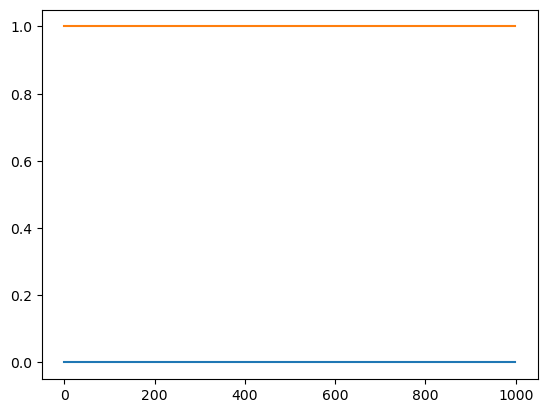

In [471]:
#A!=0
Ve = np.array([1,0,0,0])
Vu = np.array([0,1,0,0])
Vebar = np.array([0,0,1,0])
Vubar = np.array([0,0,0,1])
Vt = np.array([0,1,0,0])
Vtbar = np.array([0,0,0,1])
s1 = np.array([[0,1],[1,0]])
s2 = np.array([[0,-1j], [1j, 0]])
s3 = np.array([[1,0],[0,-1]])
    
def P_dark1(E,L,Init,End,theta12,theta13,theta23,mass_21,mass_31):
   
    #in natural unit
    Lr = L
    m = np.zeros([3,3])
    m[0,0] = 0
    m[1,1] = dm21_s
    m[2,2] = dm31_s
    P = np.zeros((len(Lr)))
    U = np.array([[c(t12)*c(t13),s(t12)*c(t13),s(t13)*np.exp(-1j*tcp)],
              [-s(t12)*c(t23)-c(t12)*s(t23)*s(t13)*np.exp(1j*tcp), c(t12)*c(t23)-s(t12)*s(t23)*s(t13)*np.exp(1j*tcp),s(t23)*c(t13)],
              [s(t12)*s(t23)-c(t12)*c(t23)*s(t13)*np.exp(1j*tcp),-c(t12)*s(t23)-s(t12)*c(t23)*s(t13)*np.exp(1j*tcp),c(t23)*c(t13)]])
    Ap = np.zeros([2,2])
    Ap = np.array([[0,dm21_s],[dm21_s,0]])
    matm = 3e-12
    H1 = matm/(4*E)*np.sin(2*t23)+np.real(dm32_s)
    H1bar = matm/(4*E)*np.sin(2*t23)-np.real(dm32_s)
    H2 = 0
    H3 = -matm/(4*E)*np.cos(2*t23)
    H3bar = -matm/(4*E)*np.cos(2*t23)
    zero = np.zeros([2,2])
    Heff = np.zeros([4,4],dtype = np.complex128)
    A1 = H1*s1+Ap
    A2 = H2*s2-np.conjugate(Ap)
    A3 = H3*s3
    for i in range(2):
        for j in range(2):
            Heff[i-1][j-1] = A1[i-1][j-1]
            Heff[i+1][j+2] = A2[i-1][j-1]
            Heff[i-1][j+2] = zero[i-1][j-1]
            Heff[i+2][j-1] = zero[i-1][j-1]
    c_t_1 = np.zeros((len(Lr)),dtype = np.complex128)
    c_t_2 = np.zeros((len(Lr)),dtype = np.complex128)
    c_t_3 = np.zeros((len(Lr)),dtype = np.complex128)
    c_t_4 = np.zeros((len(Lr)),dtype = np.complex128)
    c_t_5 = np.zeros((len(Lr)),dtype = np.complex128)
    c_t_6 = np.zeros((len(Lr)),dtype = np.complex128)
    
    Losc = np.abs(np.sqrt(4 / np.trace(Heff @ Heff)))
   
    for L_idx in range(len(Lr)): 
        P[L_idx] = (H1**2+H2**2)*Losc**2*np.sin(Lr[L_idx]/Losc)**2
        #I = np.identity(4)
        #evo = I*np.cos(L[L_idx]/Losc)-1j*Losc*Heff*np.sin(L[L_idx]/Losc)
        #Init_evo = np.dot(Init.T,evo)
        #P[L_idx] = np.abs((End*Init_evo)) @ np.abs((End*Init_evo))
    for L_idx in range(len(Lr)):
        w, v = lin.eig(Heff)
        # Sort eigenvectors in order of eigenvalue 
        idx = np.argsort(w) 
        w = w[idx]
        v = v[:,idx]
        c_t_1[0] = np.conj(v[:,0].T) @ Init.T
        c_t_2[0] = np.conj(v[:,1].T) @ Init.T
        c_t_3[0] = np.conj(v[:,2].T) @ Init.T
        c_t_4[0] = np.conj(v[:,3].T) @ Init.T
        L1 = L[L_idx]
        c_t_1[L_idx] = c_t_1[0] * np.exp(-1j*w[0]*L1)
        c_t_2[L_idx] = c_t_2[0] * np.exp(-1j*w[1]*L1)
        c_t_3[L_idx] = c_t_3[0] * np.exp(-1j*w[2]*L1)
        c_t_4[L_idx] = c_t_4[0] * np.exp(-1j*w[3]*L1)
        psi = c_t_1[L_idx] * v[:,0] + c_t_2[L_idx] * v[:,1] +c_t_3[L_idx] * v[:,2]+c_t_4[L_idx] * v[:,3]
        P[L_idx]= np.abs(End@psi.T)*np.abs(End@psi.T)
    return P
Lr = np.linspace(0,4e5,1000)
Peu = P_dark1(12,Lr,Ve,Vu,t12,t13,t23,dm21_s,dm31_s)
plt.plot(Peu)
plt.plot(1-Peu)

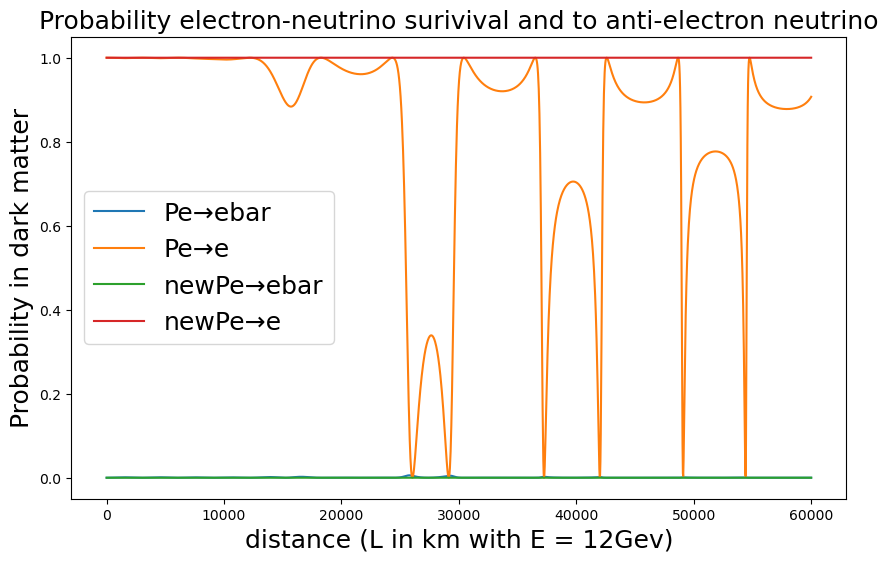

In [468]:
def P_dark2(E,L,Init,End,theta12,theta13,theta23,mass_21,mass_31):
    #in natural unit
    Lr = L
    m = np.zeros([3,3])
    m[0,0] = 0
    m[1,1] = dm21_s
    m[2,2] = dm31_s
    U = np.array([[c(t12)*c(t13),s(t12)*c(t13),s(t13)*np.exp(-1j*tcp)],
              [-s(t12)*c(t23)-c(t12)*s(t23)*s(t13)*np.exp(1j*tcp), c(t12)*c(t23)-s(t12)*s(t23)*s(t13)*np.exp(1j*tcp),s(t23)*c(t13)],
              [s(t12)*s(t23)-c(t12)*c(t23)*s(t13)*np.exp(1j*tcp),-c(t12)*s(t23)-s(t12)*c(t23)*s(t13)*np.exp(1j*tcp),c(t23)*c(t13)]])
    Bp = np.zeros([3,3])
    Ap = np.zeros([3,3])
    #Bp = np.diag([dm21_s/2/E,dm31_s/2/E,dm32_s/2/E])
    Ap = np.diag([dm32_s/2/E,dm31_s/2/E,dm21_s/2/E])
    Heff = np.zeros([6,6],dtype = np.complex128)
    A1 = U@(m@np.conjugate(m) / (2 * E))@hermi(U) + Ap
    A2 = np.conjugate(U)@(m@np.conjugate(m) / (2 * E))@hermi(U) - np.conjugate(Ap)
    for i in range(3):
        for j in range(3):
            Heff[i-1][j-1] = A1[i-1][j-1]
            Heff[i+2][j+2] = A2[i-1][j-1]
            Heff[i-1][j+2] = Bp[i-1][j-1]
            Heff[i+2][j-1] = hermi(Bp)[i-1][j-1]
    #Heff = np.array([[U@(m@np.conjugate(m) / (2 * E))@hermi(U) + Ap,Bp],[hermi(Bp),U@(m@np.conjugate(m)/(2 * E))@hermi(U) - np.conjugate(Ap)]])
    #print(" The Hamilitation is",Heff)
    Sm = np.diag([dm32_s,dm21_s,dm31_s])
    P = np.zeros((len(Lr)))
    Sf = U @ Sm @ hermi(U)
    Losc = np.abs(np.sqrt(4 / np.trace(Heff @ Heff)))
    #b!=0
    
    for L_idx in range(len(Lr)): 
        I = np.identity(6)
        evo = I - 1j * Losc*Heff * np.sin(L[L_idx] / Losc) - 2 * L[L_idx]**2 * Heff @ Heff * np.sin(L[L_idx] / (2 * Losc))
        #evo = expm(-1j*Heff*L[L_idx])
        Init_evo = np.dot(Init.T,evo)
        P[L_idx] = np.abs((End*Init_evo)) @ np.abs((End*Init_evo))
    #P = normalize(P)
       # P[L_idx] = np.abs((End*psi))@np.abs((End*psi))
    #P = P/max(P)
    return P
Lr = np.linspace(0,6e5,2000)
P11= P_dark2(12,Lr,Ve,Ve,t12,t13,t23,dm21_s,dm31_s)
P11= P_dark2(12,Lr,Ve,Ve,t12,t13,t23,dm21_s,dm31_s)
P21= P_dark2(12,Lr,Ve,Vu,t12,t13,t23,dm21_s,dm31_s)
P31= P_dark2(12,Lr,Ve,Vt,t12,t13,t23,dm21_s,dm31_s)
P41= P_dark2(12,Lr,Ve,Vebar,t12,t13,t23,dm21_s,dm31_s)
P51= P_dark2(12,Lr,Ve,Vubar,t12,t13,t23,dm21_s,dm31_s)
P61= P_dark2(12,Lr,Ve,Vtbar,t12,t13,t23,dm21_s,dm31_s)
Peebar1 = P41/(P11+P21+P31+P41+P51+P61)
Pee1 = P11/(P11+P21+P31+P41+P51+P61)

plt.figure(figsize=(10,6))
plt.ylabel('Probability in dark matter', fontsize=18)
plt.xlabel('distance (L in km with E = 12Gev)', fontsize=18)
plt.title(f'Probability electron-neutrino surivival and to anti-electron neutrino', fontsize=18)
#plt.legend(['anti-electron neutrino'], fontsize=18)
plt.plot(Lr/10,Peebar)
plt.plot(Lr/10,Pee)
plt.plot(Lr/10,Peebar1)
plt.plot(Lr/10,Pee1)
plt.legend(['Pe→ebar','Pe→e','newPe→ebar','newPe→e'], fontsize=18)

In [91]:
def plotter_dark(L,E,flavour_init,flavour_end,theta12,theta13,theta23,mass_21,mass_31):
    if flavour_init == 1:
        flavour_init = np.array([1,0,0,0,0,0])
    elif flavour_init == 2:
        flavour_init = np.array([0,1,0,0,0,0])
    elif flavour_init == 3:
        flavour_init = np.array([0,0,1,0,0,0])
    if flavour_end == 1:
        flavour_end = np.array([1,0,0,0,0,0])
    elif flavour_end == 2:
        flavour_end = np.array([0,1,0,0,0,0])
    elif flavour_end == 3:
        flavour_end = np.array([0,0,1,0,0,0])
    L = np.linspace(0,L,1000)
    P = P_dark(E,L,flavour_init,flavour_end,theta12,theta13,theta23,mass_21,mass_31)
    plt.figure(figsize=(10,6))
    ratio = np.linspace(0,L/E,1000)
    plt.plot(ratio,P)
    plt.grid()
    plt.ylim(0,1)
    plt.ylabel('Probability', fontsize=18)
    plt.xlabel('distance (L with km)', fontsize=18)
    plt.title(f'Oscillation in dark matter', fontsize=18)
    plt.show()
    
iplot_dark = interactive(plotter_dark,L=(0,40000,400),E=(0,40000,int(400)),flavour_init=(1,6,1),flavour_end=(1,6,1),theta12=(-180,180,0.1),theta13=(-180,180,0.1),
                         theta23=(-180,180,0.1),mass_21=(0,100e-5,0.1e-5),mass_31=(0,100e-3,0.1e-3))
iplot_dark

interactive(children=(IntSlider(value=20000, description='L', max=40000, step=400), IntSlider(value=20000, des…